In [2]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import time

In [24]:
with open('pyomo_results.pkl', 'rb') as file:
    results_pyomo = pickle.load(file)

# jax_diffrax_results
with open('jax_diffrax_results.pkl', 'rb') as file:
    results_jax_diffrax = pickle.load(file)

one_layer_keys = list(results_pyomo.keys())[:5]
results_pyomo_1l = {k: results_pyomo[k] for k in results_pyomo if k in one_layer_keys}
results_jax_diffrax_1l = {k: results_jax_diffrax[k] for k in results_jax_diffrax if k in one_layer_keys}

results_pyomo_2l = {k: {} for k in results_pyomo if k not in one_layer_keys}
results_jax_diffrax_2l = {k: results_jax_diffrax[k] for k in results_jax_diffrax if k not in one_layer_keys}

del results_pyomo['[2, 32, 32, 2]'] # this training failed

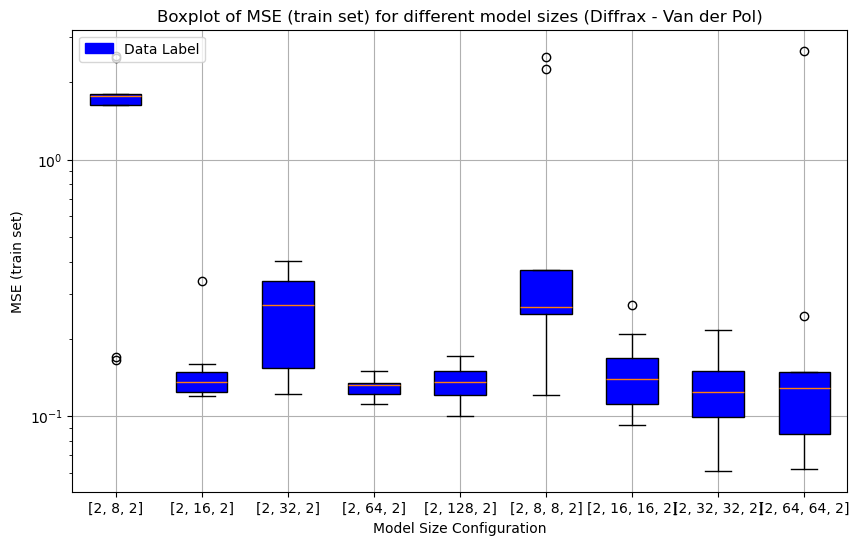

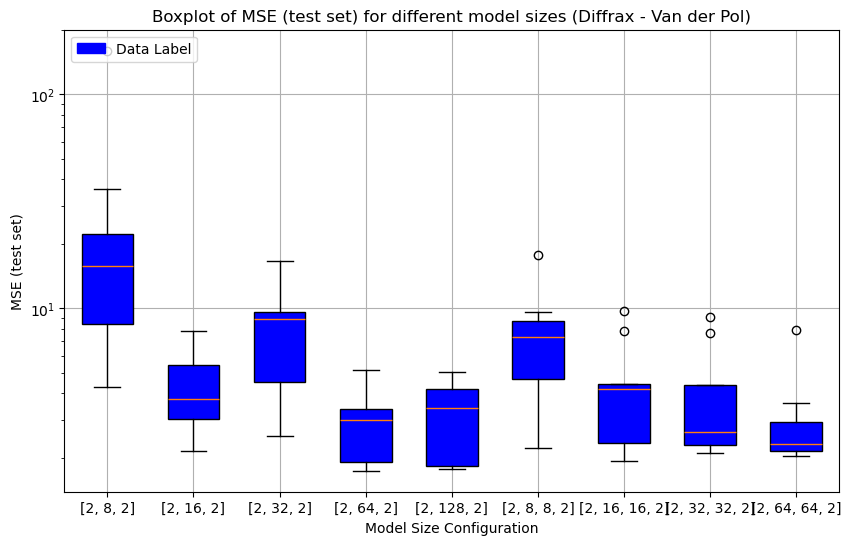

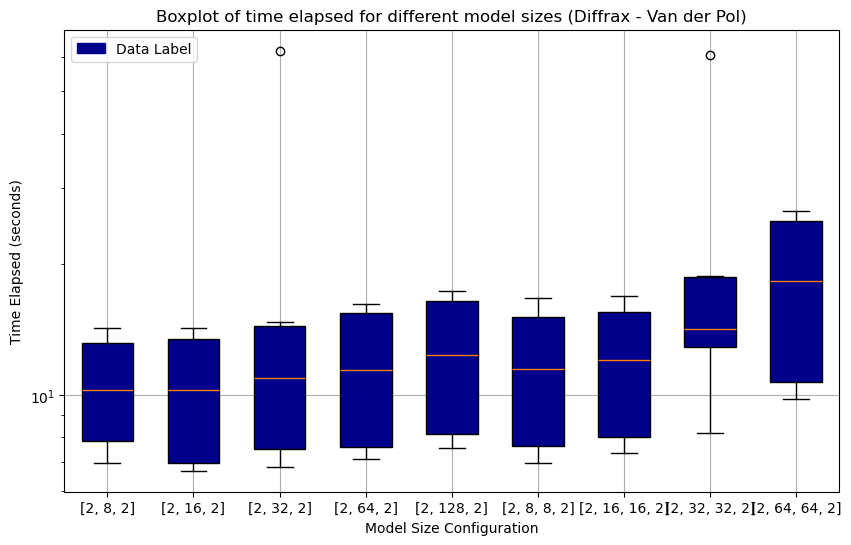

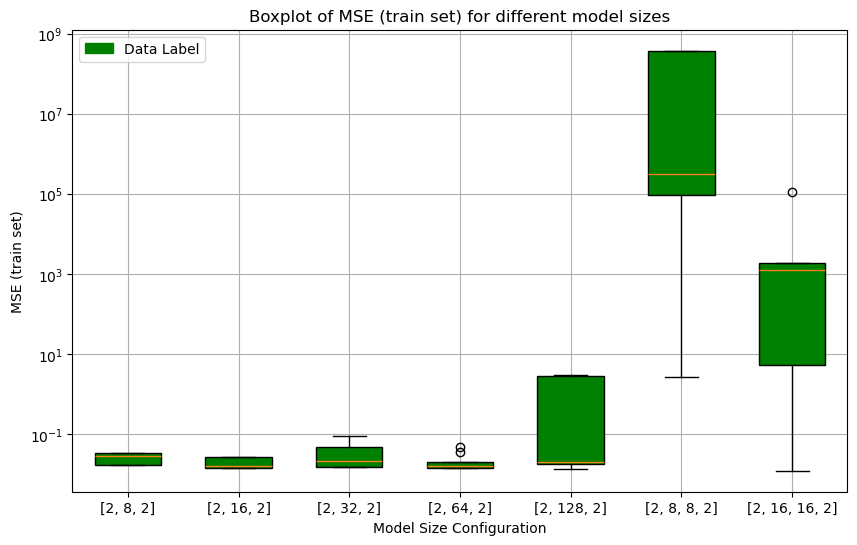

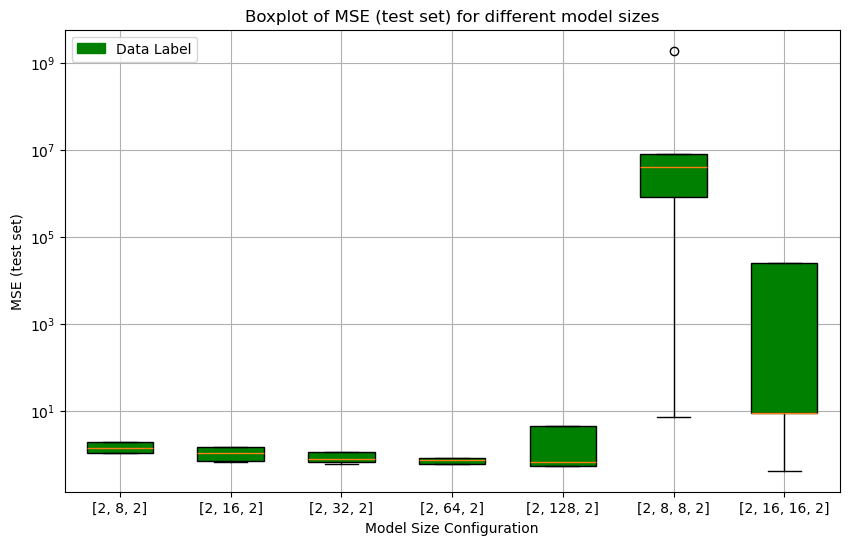

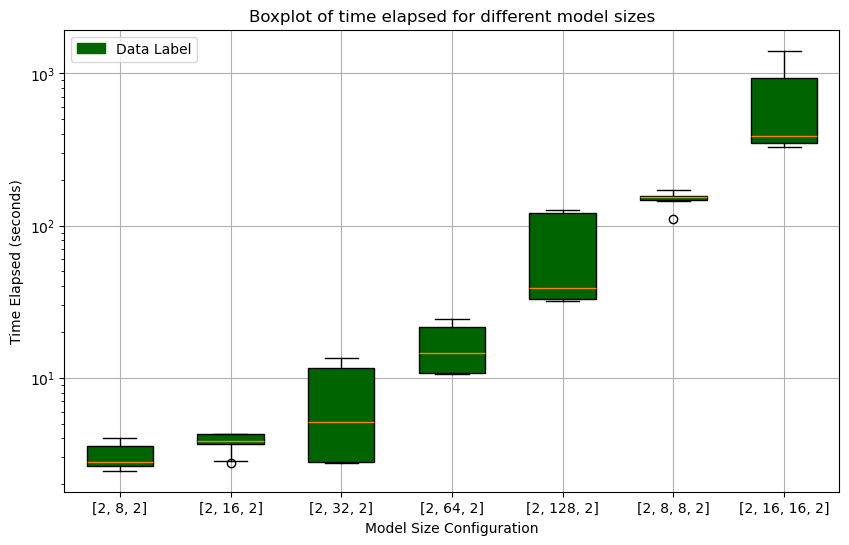

In [25]:
def collect_data(results):
    acc_train, acc_test, time = [], [], []
    for lw in results.keys():
        acc_temp_train = [results[lw][param_comb]['mse_train'].item() for param_comb in results[lw]]
        acc_temp_test = [results[lw][param_comb]['mse_test'].item() for param_comb in results[lw]]
        time_temp = [results[lw][param_comb]['time_elapsed'] for param_comb in results[lw]]
        
        acc_train.append(acc_temp_train)
        acc_test.append(acc_temp_test)
        time.append(time_temp)
    return acc_train, acc_test, time

def plot_boxplots(data1, data2, labels, title, ylabel, colors=('blue', 'green')):
    n_groups = len(data1)
    positions_1 = [2 * i + 1.1 for i in range(n_groups)]
    positions_2 = [2 * i + 1.9 for i in range(n_groups)]
    
    plt.figure(figsize=(10, 6))
    box1 = plt.boxplot(data1, positions=positions_1, widths=0.6, patch_artist=True, boxprops=dict(facecolor=colors[0]))
    box2 = plt.boxplot(data2, positions=positions_2, widths=0.6, patch_artist=True, boxprops=dict(facecolor=colors[1]))
    
    plt.title(title)
    plt.xlabel('Model Size Configuration')
    plt.ylabel(ylabel)
    plt.yscale('log')
    
    xticks = [2 * i + 1.5 for i in range(n_groups)]
    plt.xticks(ticks=xticks, labels=labels)
    
    patch1 = mpatches.Patch(color=colors[0], label='Pyomo')
    patch2 = mpatches.Patch(color=colors[1], label='Diffrax')
    
    plt.legend(handles=[patch1, patch2], loc='upper left')
    plt.grid(True)
    plt.show()
    
def plot_single_boxplot(data, labels, title, ylabel, color='blue'):
    n_groups = len(data)
    positions = [i + 1 for i in range(n_groups)]
    
    plt.figure(figsize=(10, 6))
    box = plt.boxplot(data, positions=positions, widths=0.6, patch_artist=True, boxprops=dict(facecolor=color))
    
    plt.title(title)
    plt.xlabel('Model Size Configuration')
    plt.ylabel(ylabel)
    plt.yscale('log')
    
    plt.xticks(ticks=positions, labels=labels)
    
    patch = mpatches.Patch(color=color, label='Data Label')  # Customize label as needed
    
    # plt.axhline(y=min_acc, color='r', linestyle='--', label='Minimum MSE')
    plt.legend(handles=[patch], loc='upper left')
    plt.grid(True)
    plt.show()

acc_train_jd, acc_test_jd, time_jd = collect_data(results_jax_diffrax)
#min_acc = min(min(acc_train_pm))

plot_single_boxplot(acc_train_jd, list(results_jax_diffrax.keys()), 
              'Boxplot of MSE (train set) for different model sizes (Diffrax - Van der Pol)', 
              'MSE (train set)')

plot_single_boxplot(acc_test_jd, list(results_jax_diffrax.keys()), 
              'Boxplot of MSE (test set) for different model sizes (Diffrax - Van der Pol)', 
              'MSE (test set)')

plot_single_boxplot(time_jd, list(results_jax_diffrax.keys()), 
              'Boxplot of time elapsed for different model sizes (Diffrax - Van der Pol)', 
              'Time Elapsed (seconds)', 
              color='darkblue')

acc_train_pm, acc_test_pm, time_pm = collect_data(results_pyomo)

plot_single_boxplot(acc_train_pm, list(results_pyomo.keys()), 
              'Boxplot of MSE (train set) for different model sizes', 
              'MSE (train set)', 'green')

plot_single_boxplot(acc_test_pm, list(results_pyomo.keys()), 
              'Boxplot of MSE (test set) for different model sizes', 
              'MSE (test set)', 'green')

plot_single_boxplot(time_pm, list(results_pyomo.keys()), 
              'Boxplot of time elapsed for different model sizes', 
              'Time Elapsed (seconds)', 'darkgreen')


In [26]:
acc_train_pm, acc_test_pm, time_pm = collect_data(results_pyomo)

In [28]:
[np.mean(k) for k in time_jd]

[10.346066580878365,
 10.393155945671928,
 16.293524556689793,
 11.473588784535727,
 12.355261034435696,
 11.535601403978136,
 12.04575612809923,
 19.391752507951523,
 18.25075324376424]

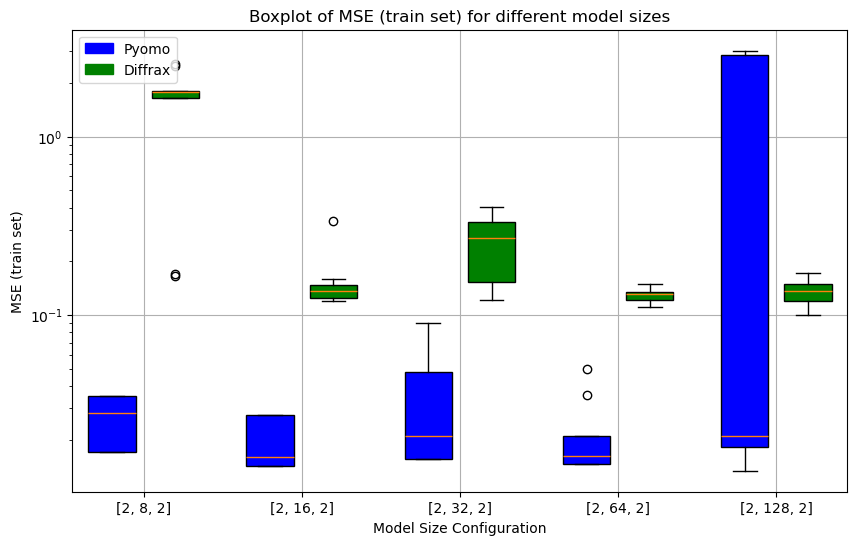

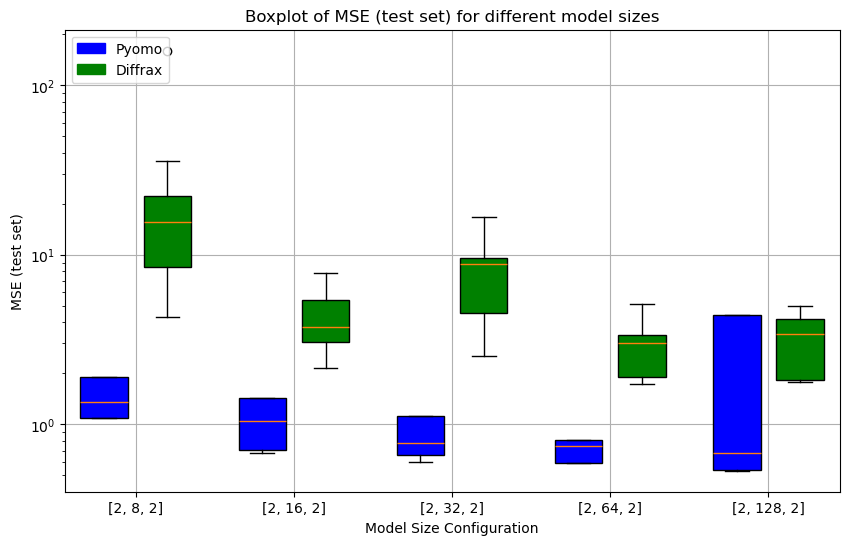

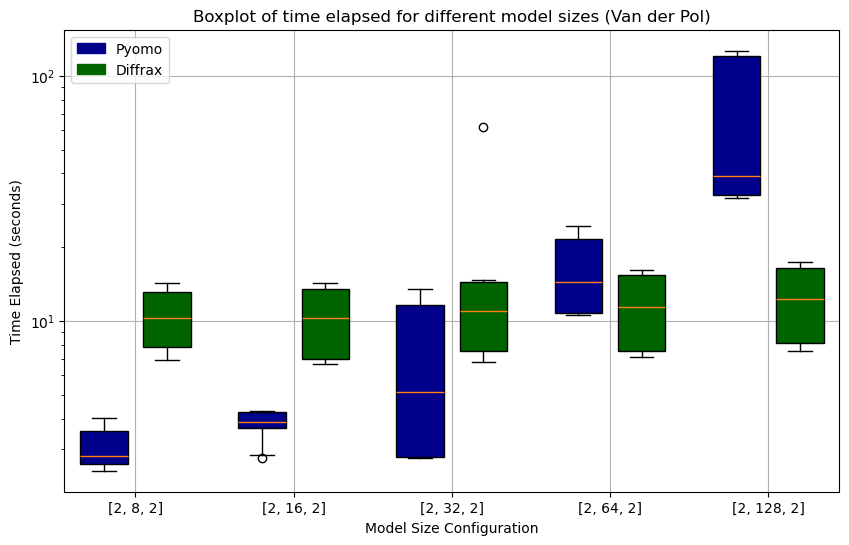

In [6]:
def collect_data(results):
    acc_train, acc_test, time = [], [], []
    for lw in results.keys():
        acc_temp_train = [results[lw][param_comb]['mse_train'].item() for param_comb in results[lw]]
        acc_temp_test = [results[lw][param_comb]['mse_test'].item() for param_comb in results[lw]]
        time_temp = [results[lw][param_comb]['time_elapsed'] for param_comb in results[lw]]
        
        acc_train.append(acc_temp_train)
        acc_test.append(acc_temp_test)
        time.append(time_temp)
    return acc_train, acc_test, time

acc_train_pm, acc_test_pm, time_pm = collect_data(results_pyomo_1l)
acc_train_jd, acc_test_jd, time_jd = collect_data(results_jax_diffrax_1l)

plot_boxplots(acc_train_pm, acc_train_jd, list(results_pyomo_1l.keys()), 
              'Boxplot of MSE (train set) for different model sizes', 
              'MSE (train set)')

plot_boxplots(acc_test_pm, acc_test_jd, list(results_pyomo_1l.keys()), 
              'Boxplot of MSE (test set) for different model sizes', 
              'MSE (test set)')

plot_boxplots(time_pm, time_jd, list(results_pyomo_1l.keys()), 
              'Boxplot of time elapsed for different model sizes (Van der Pol)', 
              'Time Elapsed (seconds)',
              colors=('darkblue', 'darkgreen'))


---

In [7]:
def extract_metrics(results_dict):
    time_elapsed, mse_train, mse_test = [], [], []
    for key, value in results_dict.items():
        time_elapsed.append(value['time_elapsed'])
        mse_train.append(value['mse_train'].item())
        mse_test.append(value['mse_test'].item())
    return time_elapsed, mse_train, mse_test

In [8]:
fn = 'diffrax_2024-08-20_12-48-50_network_size.pkl' # ho
fn = 'diffrax_2024-08-20_14-50-51_network_size.pkl' # vdp
with open(f'results/{fn}', 'rb') as file:
    results = pickle.load(file)

keys = list(results.keys())
time_elapsed, mse_train, mse_test = extract_metrics(results)

df_diffrax = pd.DataFrame({
    'hidden_layer': [key[0] for key in keys],
    'regularizarition': [key[1] for key in keys],
    'tolerance': [key[2] for key in keys],
    'time_elapsed': time_elapsed,
    'mse_train': mse_train,
    'mse_test': mse_test
})

fn = '2024-08-20_12-44-48_network_size.pkl' # ho
fn = '2024-08-20_14-49-50_network_size_vdp.pkl' # vdp

with open(f'results/{fn}', 'rb') as file:
    results = pickle.load(file)

keys = list(results.keys())
time_elapsed, mse_train, mse_test = extract_metrics(results)

df_pyomo = pd.DataFrame({
    'hidden_layer': [key[0] for key in keys],
    'regularizarition': [key[1] for key in keys],
    'tolerance': [key[2] for key in keys],
    'time_elapsed': time_elapsed,
    'mse_train': mse_train,
    'mse_test': mse_test
})


In [9]:
df_pyomo_grouped = df_pyomo.groupby('hidden_layer').agg(list).reset_index()
df_diffrax_grouped = df_diffrax.groupby('hidden_layer').agg(list).reset_index()

In [10]:
df_pyomo.sort_values(by='mse_test', inplace=False).head()

,hidden_layer,regularizarition,tolerance,time_elapsed,mse_train,mse_test
19,128,0.0001,0.000001,46.086069,3.694240,0.091313
9,32,0.0010,0.000001,7.274487,0.022558,0.408992
3,16,0.0010,0.000001,4.014912,0.019441,0.467322
2,16,0.0010,0.000100,3.942988,0.020492,0.469480
1,16,0.0001,0.000001,5.602385,0.032084,0.502502


In [11]:
df_diffrax.sort_values(by='mse_test', inplace=False).head()

,hidden_layer,regularizarition,tolerance,time_elapsed,mse_train,mse_test
26,64,0.00100,5000,11.728492,0.181509,0.726955
8,16,0.00100,5000,10.076901,0.426542,0.851304
19,64,0.00001,2500,7.510430,0.168872,0.925286
23,64,0.00010,5000,11.202686,0.195303,0.928717
35,128,0.00100,5000,12.515789,0.255362,0.957936


In [12]:
df_pyomo_grouped.head()

,hidden_layer,regularizarition,tolerance,time_elapsed,mse_train,mse_test
0,16,"[0.0001, 0.0001, 0.001, 0.001, 0.01, 0.01]","[0.0001, 1e-06, 0.0001, 1e-06, 0.0001, 1e-06]","[5.771953821182251, 5.6023852825164795, 3.9429...","[0.13177065551280975, 0.03208395838737488, 0.0...","[0.5251699686050415, 0.5025016665458679, 0.469..."
1,32,"[0.0001, 0.0001, 0.001, 0.001, 0.01, 0.01]","[0.0001, 1e-06, 0.0001, 1e-06, 0.0001, 1e-06]","[6.343366861343384, 6.689677715301514, 7.01785...","[0.166514590382576, 0.11315520107746124, 0.020...","[2.532914161682129, 6.417247772216797, 0.61979..."
2,64,"[0.0001, 0.0001, 0.001, 0.001, 0.01, 0.01]","[0.0001, 1e-06, 0.0001, 1e-06, 0.0001, 1e-06]","[13.004357814788818, 13.373730897903442, 15.85...","[0.02558654546737671, 0.027046609669923782, 0....","[0.516811192035675, 0.5127525329589844, 0.6528..."
3,128,"[0.0001, 0.0001, 0.001, 0.001, 0.01, 0.01]","[0.0001, 1e-06, 0.0001, 1e-06, 0.0001, 1e-06]","[49.69170808792114, 46.086068868637085, 19.969...","[158.4297332763672, 3.694239854812622, 0.03355...","[79.38339233398438, 0.09131287783384323, 0.544..."


In [13]:
def plot_boxplots(data1, data2, labels, title, ylabel, colors=('blue', 'green')):
    n_groups = len(data1)
    positions_1 = [2 * i + 1.1 for i in range(n_groups)]
    positions_2 = [2 * i + 1.9 for i in range(n_groups)]
    
    plt.figure(figsize=(10, 6))
    box1 = plt.boxplot(data1, positions=positions_1, widths=0.6, patch_artist=True, boxprops=dict(facecolor=colors[0]))
    box2 = plt.boxplot(data2, positions=positions_2, widths=0.6, patch_artist=True, boxprops=dict(facecolor=colors[1]))
    
    plt.title(title)
    plt.xlabel('Model Size Configuration')
    plt.ylabel(ylabel)
    plt.yscale('log')
    
    xticks = [2 * i + 1.5 for i in range(n_groups)]
    plt.xticks(ticks=xticks, labels=labels)
    
    patch1 = mpatches.Patch(color=colors[0], label='Pyomo')
    patch2 = mpatches.Patch(color=colors[1], label='Diffrax')
    
    plt.legend(handles=[patch1, patch2], loc='upper right')
    plt.grid(True)
    plt.show()


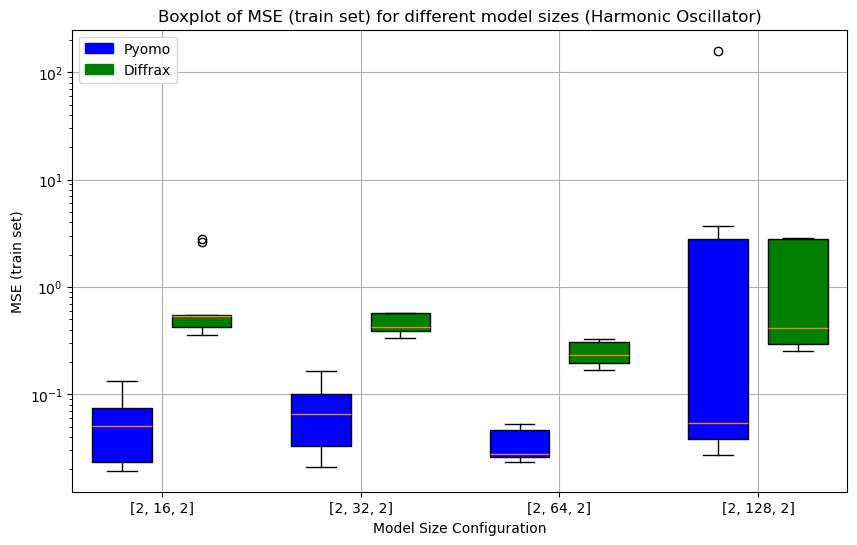

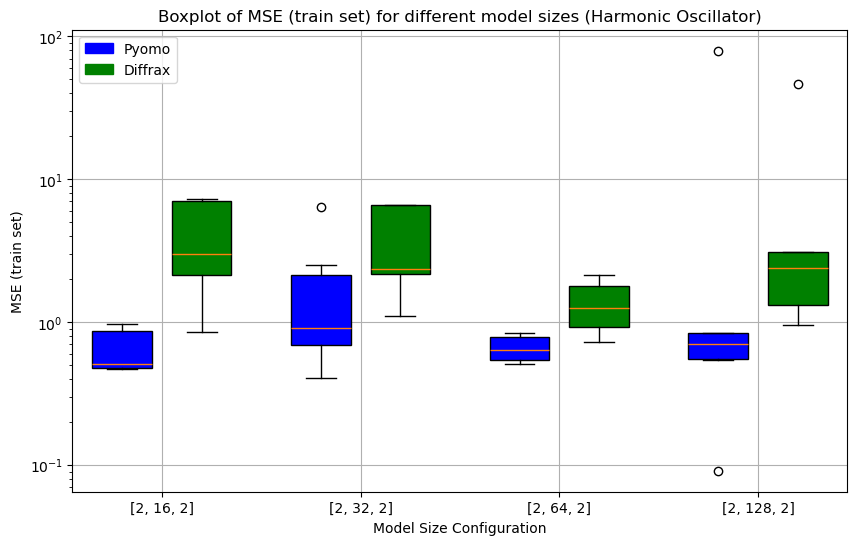

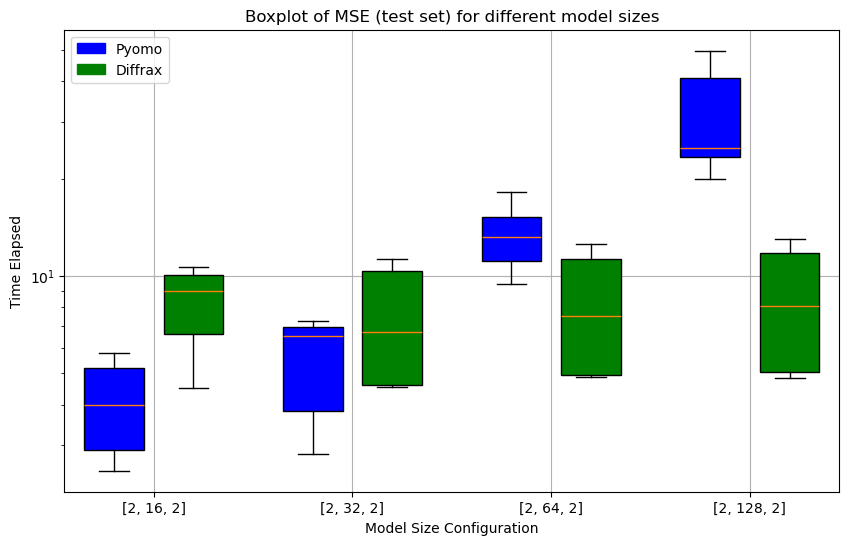

In [37]:
sizes = list([[2,k,2] for k in df_pyomo_grouped.hidden_layer])

plot_boxplots(df_pyomo_grouped.mse_train, df_diffrax_grouped.mse_train, sizes, 
              'Boxplot of MSE (train set) for different model sizes (Harmonic Oscillator)', 
              'MSE (train set)',
              )

plot_boxplots(df_pyomo_grouped.mse_test, df_diffrax_grouped.mse_test, sizes, 
              'Boxplot of MSE (train set) for different model sizes (Harmonic Oscillator)', 
              'MSE (train set)',
              )

plot_boxplots(df_pyomo_grouped.time_elapsed, df_diffrax_grouped.time_elapsed, sizes, 
              'Boxplot of MSE (test set) for different model sizes', 
              'Time Elapsed')

----

# Convergence Trends

In [30]:
def extract_metrics(results_dict):
    time_elapsed, mse_train, mse_test = [], [], []
    for key, value in results_dict.items():
        time_elapsed.append(value['time_elapsed'])
        mse_train.append(value['mse_train'].item())
        mse_test.append(value['mse_test'].item())
    return time_elapsed, mse_train, mse_test

def expand_time(row):
    if isinstance(row['time_elapsed'], list):
        for i, time in enumerate(row['time_elapsed']):
            row[f'time_elapsed_phase_{i+1}'] = time
    else:
        row['time_elapsed_phase_1'] = row['time_elapsed']
    return row

def expand_losses(row):
    if isinstance(row['losses'], list):
        for i, time in enumerate(row['losses']):
            row[f'losses{i+1}'] = time
    else:
        row['losses'] = row['losses']
    return row


In [32]:
# this part is for the training times
fn = "diffrax_2024-08-22_19-32-46_training_convergence_timings_no_log.pkl"
fn = 'diffrax_2024-08-22_22-03-24_training_convergence_timings_no_log.pkl' # 1000 epochs pre-train & 10,000 epochs without pre-train

with open(f'results/{fn}', 'rb') as file:
    results = pickle.load(file)

keys = list(results.keys())
time_elapsed, mse_train, mse_test = extract_metrics(results)

df_times = pd.DataFrame({
    'pre_train': [key[1] for key in keys],
    'data_type': [key[0] for key in keys],
    'time_elapsed': time_elapsed
})
    
df_times = df_times.apply(expand_time, axis=1)
df_times.drop(columns=['time_elapsed'], inplace=True)
df_times

,data_type,pre_train,time_elapsed_phase_1,time_elapsed_phase_2
0,ho,False,11.234818,NaN
1,ho,True,2.301672,7.710843
2,vdp,False,11.480325,NaN
3,vdp,True,2.253716,8.659685
4,do,False,12.107147,NaN
5,do,True,2.223579,7.440347


In [58]:
def plot_convergence(data, plot = True):
    # fn = "diffrax_2024-08-22_16-48-37_training_convergence.pkl" # pretraining with 5000 epochs
    fn = 'diffrax_2024-08-22_23-18-27_training_convergence.pkl' # pretraining with 1000 epochs

    with open(f'results/{fn}', 'rb') as file:
        results = pickle.load(file)

    keys = list(results.keys())
    time_elapsed, mse_train, mse_test = extract_metrics(results)

    df = pd.DataFrame({
        'losses': [results[key]['training_loss'] for key in keys],
        'pre_train': [key[1] for key in keys],
        'data_type': [key[0] for key in keys]
    })

    df = df.apply(expand_losses, axis=1)
    df.drop(columns=['losses'], inplace=True)


    df['time_elapsed_phase_1'] = df_times['time_elapsed_phase_1']
    df['time_elapsed_phase_2'] = df_times['time_elapsed_phase_2']

    def calculate_average_time(time_elapsed, losses):
        if losses and time_elapsed is not None and isinstance(losses, list):
            return time_elapsed / len(losses), len(losses)
        return None, 0

    df[['time_elapsed_phase_1', 'num_losses']] = df.apply(lambda row: calculate_average_time(row['time_elapsed_phase_1'], row['losses1']), axis=1, result_type="expand")
    df[['time_elapsed_phase_2', 'num_losses']] = df.apply(lambda row: calculate_average_time(row['time_elapsed_phase_2'], row['losses2']), axis=1, result_type="expand")

    np.logical_and(np.array(df.data_type == data), np.array(df.pre_train == False))
    df_false_jax = df[np.logical_and(np.array(df.data_type == data), np.array(df.pre_train == False))]

    np.logical_and(np.array(df.data_type == data), np.array(df.pre_train == True))
    df_true_jax = df[np.logical_and(np.array(df.data_type == data), np.array(df.pre_train == True))]

    # number of epochs for df_false_jax and df_true_jax
    epochs_false_jax = len(df_false_jax['losses1'].iloc[0]) if not df_false_jax['losses1'].isna().iloc[0] else 0
    epochs_true_jax = len(df_true_jax['losses1'].iloc[0]) if not df_true_jax['losses1'].isna().iloc[0] else 0
    epochs_true_jax_phase_2 = len(df_true_jax['losses2'].iloc[0]) if not df_true_jax['losses2'].isna().iloc[0] else 0

    # calculate times based on number of epochs
    times = np.arange(epochs_false_jax) * df_false_jax['time_elapsed_phase_1'].iloc[0]
    times1 = np.arange(epochs_true_jax) * df_true_jax['time_elapsed_phase_1'].iloc[0]
    times2 = np.arange(epochs_true_jax_phase_2) * df_true_jax['time_elapsed_phase_2'].iloc[0] if not df_true_jax['time_elapsed_phase_2'].isna().iloc[0] else np.array([])

    # LOAD PYOMO IN 
    fn = '2024-08-20_21-01-08_training_convergence.pkl' # reg : 0.0001
    fn = '2024-08-21_09-45-20_training_convergence.pkl' # reg : 0.001

    with open(f'results/{fn}', 'rb') as file:
        results = pickle.load(file)

    keys = list(results.keys())
    time_elapsed, mse_train, mse_test = extract_metrics(results)

    df = pd.DataFrame({
        #'keys' : keys,
        'iter': [key[2] for key in keys],
        'data_type': [key[0] for key in keys],
        'initialization': [key[1] for key in keys],
        'time_elapsed': time_elapsed,
        'mse_train': mse_train,
        'mse_test': mse_test
    })

    df_grouped = df.groupby(['data_type', 'initialization']).agg(list)

    df_true_pyomo = df_grouped.loc[data, True]
    df_false_pyomo = df_grouped.loc[data, False]

    time_per_iter = df_true_pyomo['time_elapsed'][-1]/len(df_true_pyomo['time_elapsed'])
    times_true_pyomo = np.arange(len(df_true_pyomo['time_elapsed']))*time_per_iter
    time_per_iter = df_false_pyomo['time_elapsed'][-1]/len(df_false_pyomo['time_elapsed'])
    times_false_pyomo = np.arange(len(df_false_pyomo['time_elapsed']))*time_per_iter

    if plot:
        plt.figure(figsize=(10, 5))
        plt.grid()
        plt.plot(times_true_pyomo, df_true_pyomo.mse_train, color = 'blue', label='MSE Train - Collocation-based (Pyomo)')
        #plt.plot(times_false_pyomo, df_false_pyomo.mse_train, 'b--', label='MSE Train (Pyomo)')
        plt.plot(times, df_false_jax.losses1.item(), color = 'coral', label='MSE Train - Sequential (Diffrax) NO pre-training', ls = '--')
        #plt.plot(times1, df_true_jax.losses1.item(), color = 'green',label='MSE Train - Sequential (Diffrax) after pre-train', alpha = 0.5)
        plt.plot(times2 + (times1)[-1], df_true_jax.losses2.item(), color = 'green', label='MSE Train - Sequential (Diffrax) WITH pre-training')
        plt.plot((times1)[-1], df_true_jax.losses2.item()[0], 'X', markersize=10, color = 'green', label='Pre-training finishes')
        plt.legend()
        plt.yscale('log')
        desc = {'ho': 'Harmonic Oscillator', 'vdp': 'Van Der Pol', 'do': 'Damped Oscillator'}
        plt.title(f'MSE Train for {desc[data]} Jax (Diffrax) vs Pyomo')
        plt.xlabel('Seconds elapsed')
        plt.ylabel('MSE')
        plt.legend(loc='upper left', bbox_to_anchor=(.0, -.1))
        plt.plot()
    else:
        return (times2 + (times1)[-1], df_true_jax.losses2.item())

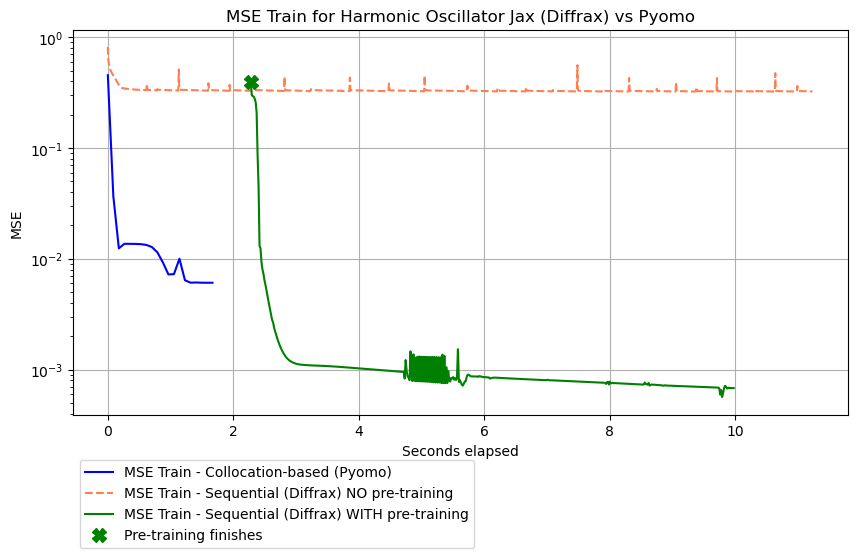

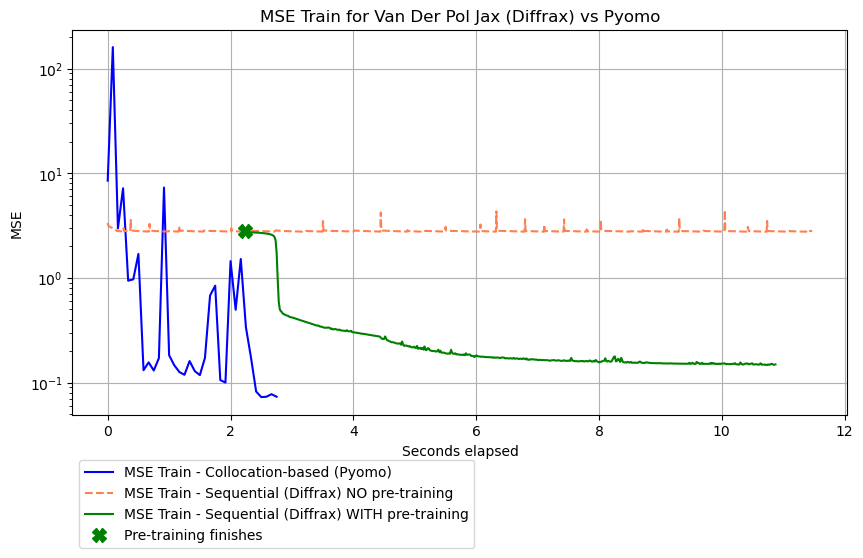

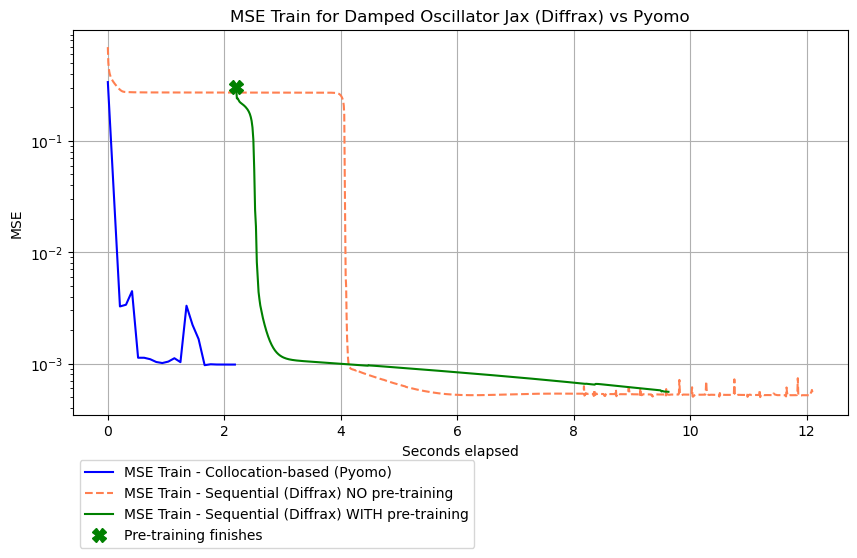

In [61]:
plot_convergence('ho')
plot_convergence('vdp')
plot_convergence('do')
times_sequential, losses_sequential = plot_convergence('vdp', False)

In [177]:
def load_results(base_filename, suffixes):
    results = {}
    for suffix in suffixes:
        fn = f'diffrax_pyomo_pretraining{suffix}.pkl'
        time_fn = f'diffrax_pyomo_pretraining_time{suffix}.pkl'

        with open(f'results/{fn}', 'rb') as file:
            results[f'result{suffix}'] = pickle.load(file)[0]

        with open(f'results/{time_fn}', 'rb') as file:
            results[f'result_time{suffix}'] = pickle.load(file)[0]
    
    return results

suffixes = ['_32', '_16', '_64', '_32_regular']
results = load_results('diffrax_pyomo_pretraining', suffixes)
results.keys()

dict_keys(['result_32', 'result_time_32', 'result_16', 'result_time_16', 'result_64', 'result_time_64', 'result_32_regular', 'result_time_32_regular'])

In [182]:
result_32_regular['training_loss']

[[],
 [0.4428501004414245,
  0.41490561052494906,
  0.39955536756632754,
  0.38661726100652527,
  0.37413718263403234,
  0.3599021304496934,
  0.34663325567523096,
  0.3322481601575032,
  0.3176647667594447,
  0.3032545291740062,
  0.29026373010604944,
  0.2763077051853131,
  0.2640509998176432,
  0.25198008086674034,
  0.2409746462135176,
  0.2374790031482209,
  0.22373250054904162,
  0.21471312104102558,
  0.2052471282833921,
  0.1959139128913279,
  0.1867978029582598,
  0.17750185093038393,
  0.1680705833132987,
  0.15873624502112682,
  0.15027806291285123,
  0.14192620767100045,
  0.13265074701766827,
  0.12674335669347972,
  0.1232429384040386,
  0.11344249680203827,
  0.10828519694036118,
  0.10350006574450173,
  0.10104253709990133,
  0.09551227544783682,
  0.091729535195701,
  0.08875874459913334,
  0.08547660105351156,
  0.08250064183749412,
  0.08400319688322622,
  0.07853430039263547,
  0.07786760823182312,
  0.07602701283371252,
  0.0734688029527221,
  0.07502137042108199,


In [196]:
result = results['result_32']
result_time = results['result_time_32']
result_16 = results['result_16']
result_time_16 = results['result_time_16']
result_64 = results['result_64']
result_time_64 = results['result_time_64']

result_32_regular = results['result_32_regular']
result_time_32_regular = results['result_time_32_regular']

# PYOMO PRETRAINING
# 32
time_per_iter = result_time['time_elapsed']/len(result['training_loss'][0])
times = [i*time_per_iter for i in range(len(result['training_loss'][0]))]
times_w_pyomo_pretrain = np.array(times) + 6.943

time_per_iter_16 = result_time_16['time_elapsed']/len(result_16['training_loss'][0])
times_16 = [i*time_per_iter_16 for i in range(len(result_16['training_loss'][0]))]
times_w_pyomo_pretrain_16 = np.array(times_16) + 3.979

time_per_iter_64 = result_time_64['time_elapsed']/len(result_64['training_loss'][0])
times_64 = [i*time_per_iter_64 for i in range(len(result_64['training_loss'][0]))]
times_w_pyomo_pretrain_64 = np.array(times_64) + 15.878

# REGULAR PRETRAINING
time_per_iter_32_regular = result_time_32_regular['time_elapsed'][1]/len(result_32_regular['training_loss'][1])
times_32_regular = [i*time_per_iter_32_regular for i in range(len(result_32_regular['training_loss'][1]))]
times_w_pyomo_pretrain_32_regular = np.array(times_32_regular) + result_time_32_regular['time_elapsed'][0]

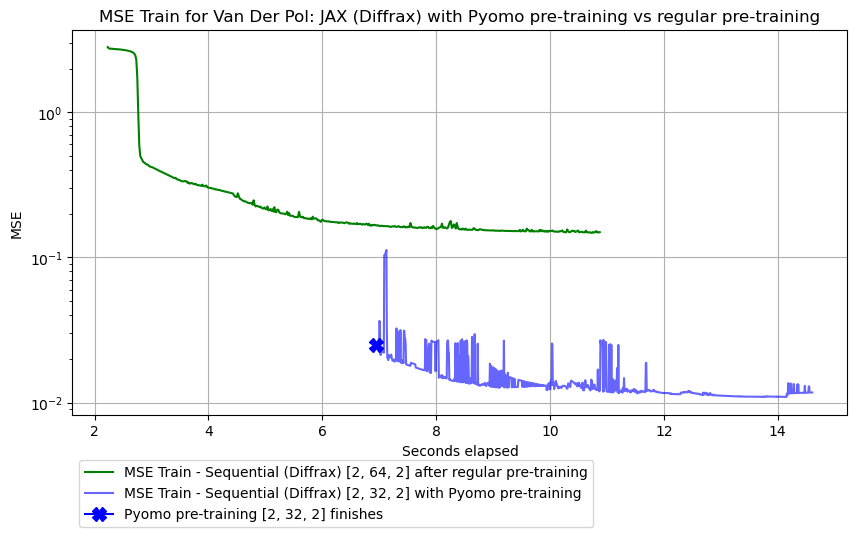

In [197]:
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(times_sequential, losses_sequential, color='green', label = 'MSE Train - Sequential (Diffrax) [2, 64, 2] after regular pre-training')
#plt.plot(times_sequential[0], losses_sequential[-1], marker='X', markersize=10, color='red', label='Final Accuracy with Sequntial after regular pre-training')
plt.plot(times_w_pyomo_pretrain[:1000], result['training_loss'][0][:1000],  color='blue', label = 'MSE Train - Sequential (Diffrax) [2, 32, 2] with Pyomo pre-training', alpha = 0.6)
plt.plot(times_w_pyomo_pretrain[:1000][0], result['training_loss'][0][0], marker='X', markersize=10, color='blue', label='Pyomo pre-training [2, 32, 2] finishes')
#plt.plot(times_w_pyomo_pretrain_16[:1000], result_16['training_loss'][0][:1000], color = 'orange', label = 'MSE Train - Sequential (Diffrax) [2, 16, 2] with Pyomo pre-training', alpha = 0.8)
#plt.plot(times_w_pyomo_pretrain_16[:1000][0], result_16['training_loss'][0][0], marker='X', markersize=10, color='darkorange', label='Pyomo pre-training [2, 16, 2] finishes')
plt.yscale('log')
plt.title('MSE Train for Van Der Pol: JAX (Diffrax) with Pyomo pre-training vs regular pre-training')
plt.xlabel('Seconds elapsed')
plt.ylabel('MSE')
plt.legend(loc='upper left', bbox_to_anchor=(.0, -.1))
plt.show()

In [198]:
len(result_32_regular['training_loss'][1])
times_w_pyomo_pretrain_32_regular

array([ 2.2328403 ,  2.31308043,  2.39332056,  2.47356069,  2.55380082,
        2.63404096,  2.71428109,  2.79452122,  2.87476135,  2.95500148,
        3.03524161,  3.11548174,  3.19572187,  3.27596201,  3.35620214,
        3.43644227,  3.5166824 ,  3.59692253,  3.67716266,  3.75740279,
        3.83764292,  3.91788306,  3.99812319,  4.07836332,  4.15860345,
        4.23884358,  4.31908371,  4.39932384,  4.47956397,  4.5598041 ,
        4.64004424,  4.72028437,  4.8005245 ,  4.88076463,  4.96100476,
        5.04124489,  5.12148502,  5.20172515,  5.28196529,  5.36220542,
        5.44244555,  5.52268568,  5.60292581,  5.68316594,  5.76340607,
        5.8436462 ,  5.92388634,  6.00412647,  6.0843666 ,  6.16460673,
        6.24484686,  6.32508699,  6.40532712,  6.48556725,  6.56580739,
        6.64604752,  6.72628765,  6.80652778,  6.88676791,  6.96700804,
        7.04724817,  7.1274883 ,  7.20772844,  7.28796857,  7.3682087 ,
        7.44844883,  7.52868896,  7.60892909,  7.68916922,  7.76

### [2, 32, 2]

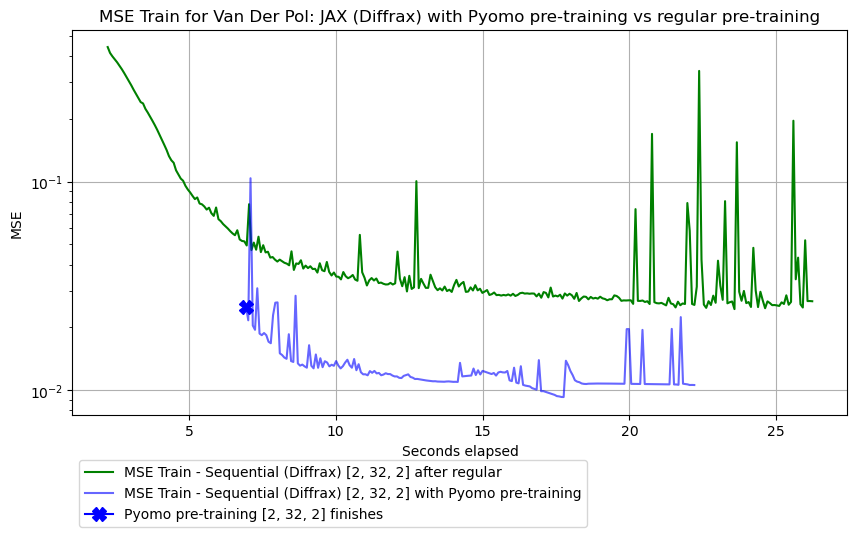

In [200]:
plt.figure(figsize=(10, 5))
plt.grid()
#plt.plot(times_sequential, losses_sequential, color='green', label = 'MSE Train - Sequential (Diffrax) [2, 64, 2] after regular pre-training')
plt.plot(times_w_pyomo_pretrain_32_regular, result_32_regular['training_loss'][1], color='green', label = 'MSE Train - Sequential (Diffrax) [2, 32, 2] after regular')
plt.plot(times_w_pyomo_pretrain[::10], result['training_loss'][0][::10],  color='blue', label = 'MSE Train - Sequential (Diffrax) [2, 32, 2] with Pyomo pre-training', alpha = 0.6)
plt.plot(times_w_pyomo_pretrain[0], result['training_loss'][0][0], marker='X', markersize=10, color='blue', label='Pyomo pre-training [2, 32, 2] finishes')
plt.yscale('log')
plt.title('MSE Train for Van Der Pol: JAX (Diffrax) with Pyomo pre-training vs regular pre-training')
plt.xlabel('Seconds elapsed')
plt.ylabel('MSE')
plt.legend(loc='upper left', bbox_to_anchor=(.0, -.1))
plt.show()

### Overall

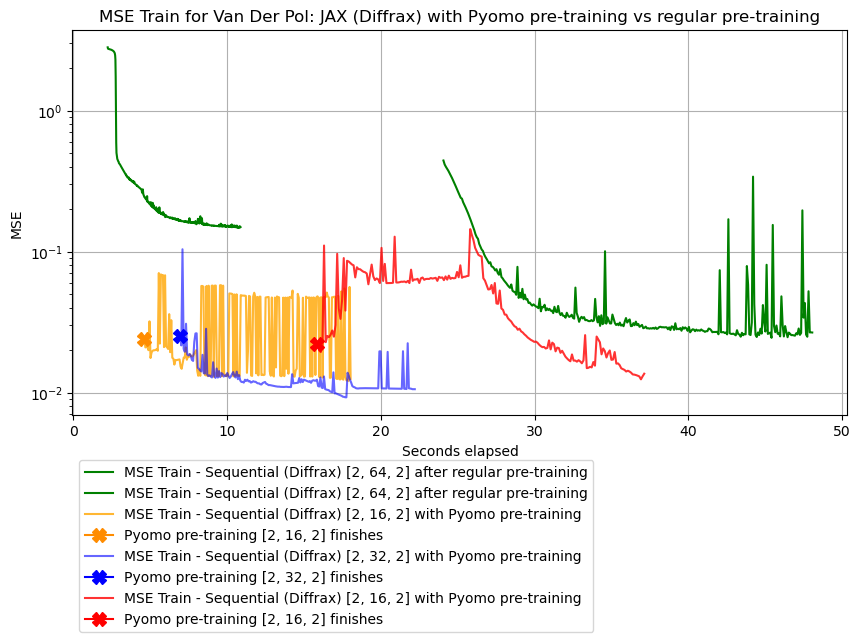

In [192]:
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(times_sequential, losses_sequential, color='green', label = 'MSE Train - Sequential (Diffrax) [2, 64, 2] after regular pre-training')
plt.plot(times_w_pyomo_pretrain_32_regular, result_32_regular['training_loss'][1], color='green', label = 'MSE Train - Sequential (Diffrax) [2, 64, 2] after regular pre-training')
#plt.plot(times_sequential[-1], losses_sequential[-1], marker='X', markersize=10, color='red', label='Final Accuracy with Sequntial after regular pre-training')
plt.plot(times_w_pyomo_pretrain_16[::10], result_16['training_loss'][0][::10], color = 'orange', label = 'MSE Train - Sequential (Diffrax) [2, 16, 2] with Pyomo pre-training', alpha = 0.8)
plt.plot(times_w_pyomo_pretrain_16[0], result_16['training_loss'][0][0], marker='X', markersize=10, color='darkorange', label='Pyomo pre-training [2, 16, 2] finishes')
plt.plot(times_w_pyomo_pretrain[::10], result['training_loss'][0][::10],  color='blue', label = 'MSE Train - Sequential (Diffrax) [2, 32, 2] with Pyomo pre-training', alpha = 0.6)
plt.plot(times_w_pyomo_pretrain[0], result['training_loss'][0][0], marker='X', markersize=10, color='blue', label='Pyomo pre-training [2, 32, 2] finishes')
plt.plot(times_w_pyomo_pretrain_64[::10], result_64['training_loss'][0][::10], color = 'red', label = 'MSE Train - Sequential (Diffrax) [2, 16, 2] with Pyomo pre-training', alpha = 0.8)
plt.plot(times_w_pyomo_pretrain_64[0], result_64['training_loss'][0][0], marker='X', markersize=10, color='red', label='Pyomo pre-training [2, 16, 2] finishes')
plt.yscale('log')
plt.title('MSE Train for Van Der Pol: JAX (Diffrax) with Pyomo pre-training vs regular pre-training')
plt.xlabel('Seconds elapsed')
plt.ylabel('MSE')
plt.legend(loc='upper left', bbox_to_anchor=(.0, -.1))
plt.show()